<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Preprocesamiento de Datos
## Tarea 2 
## Datos anómalos/atípicos/outliers

Importamos la libreria pandas

In [47]:
import pandas as pd 
import numpy as np

Cargamos el dataset y mostramos algunos datos

In [48]:
df = pd.read_csv('https://datahub.io/machine-learning/hepatitis/r/hepatitis.csv')
df.head(n=10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


Reemplazamos los datos faltantes

In [49]:
df = df.interpolate()
df.head(n=10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.70,96.0,32.000000,4.000000,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.00,70.5,200.000000,4.000000,77.5,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live


Realizamos un histograma de la columna albumin

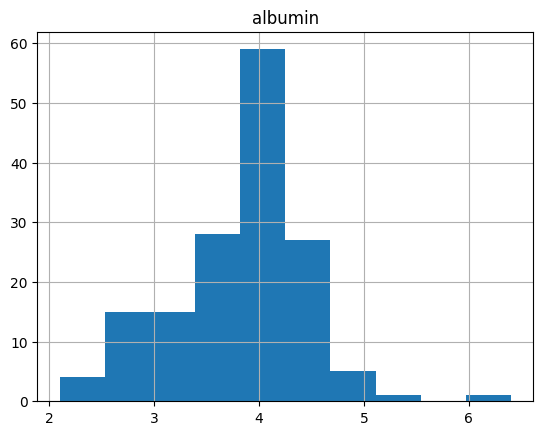

In [50]:
histo = df.hist(column='albumin')

Calculamos el cuartil 1 y 3 así como el IQR (rango intercuartil)

In [51]:
def calculate_quartiles(columna):
  quartiles = df[columna].quantile(q=[0.25, 0.75])
  iqr = quartiles[0.75] - quartiles[0.25]
  print(quartiles,'\n',iqr)
  return quartiles,iqr

In [52]:
qrt_albumin, iqr_albumin = calculate_quartiles('albumin')

0.25    3.425
0.75    4.200
Name: albumin, dtype: float64 
 0.7750000000000004


Hacemos el diagrama de caja

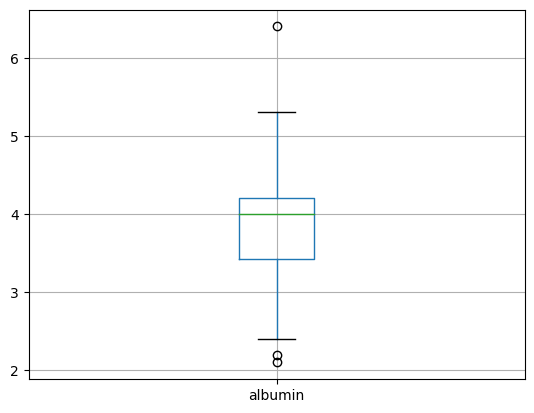

In [53]:
boxplot = df.boxplot(column=['albumin'])

Obtenemos los valores de los bigotes superior e inferior así como la ubicacion de los outliers y eliminamos los outliers

In [54]:
def calculate_outliers(columna,qrt,iqr):
  sup = qrt[0.75] + 1.5*iqr
  inf = qrt[0.25] - 1.5*iqr
  upper = df[columna] > sup
  lower = df[columna] < inf
  print('Bigote Superior: ',sup,'\nBigote Inferior: ', inf)
  outliers_upper = np.where(upper)
  outliers_lower = np.where(lower)
  print('outliers superior:', outliers_upper,'\noutliers_inferior: ', outliers_lower)
  return upper,lower

Eliminamos los outliers

In [55]:
def eliminate_outliers(columna,qrt,iqr):
  upper,lower = calculate_outliers(columna,qrt,iqr)
  df.drop(df.loc[(upper) | (lower)].index, inplace = True) 

In [56]:
eliminate_outliers('albumin',qrt_albumin, iqr_albumin)

Bigote Superior:  5.362500000000001 
Bigote Inferior:  2.2624999999999993
outliers superior: (array([105]),) 
outliers_inferior:  (array([104, 131]),)


Realizamos nuevamente el histograma y el diagrama de caja

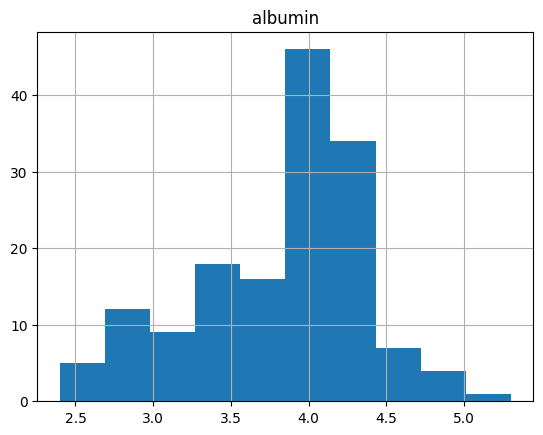

In [57]:
histo = df.hist(column='albumin')

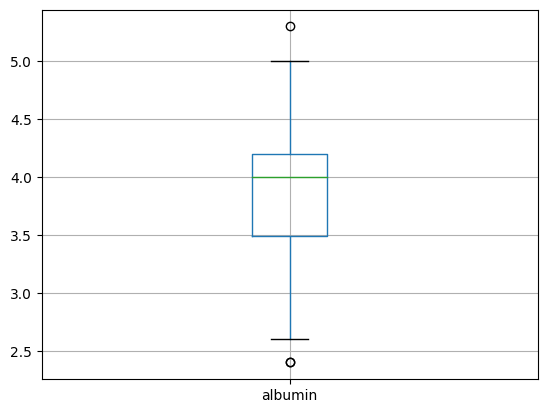

In [58]:
boxplot = df.boxplot(column=['albumin'])

Ahora vamos a realizar el mismo proceso para la columna sgot

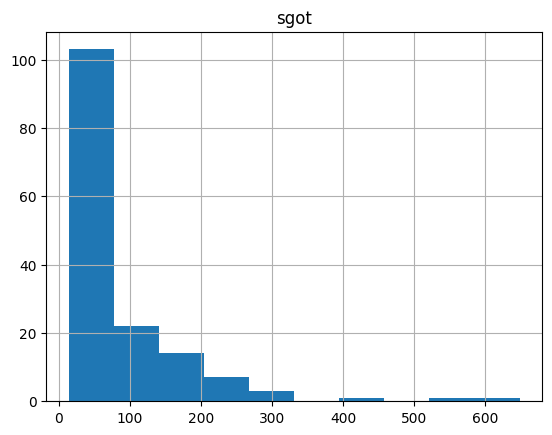

In [59]:
histo = df.hist(column='sgot')

In [60]:
qrt_sgot,iqr_sgot = calculate_quartiles('sgot')

0.25    32.75
0.75    98.50
Name: sgot, dtype: float64 
 65.75


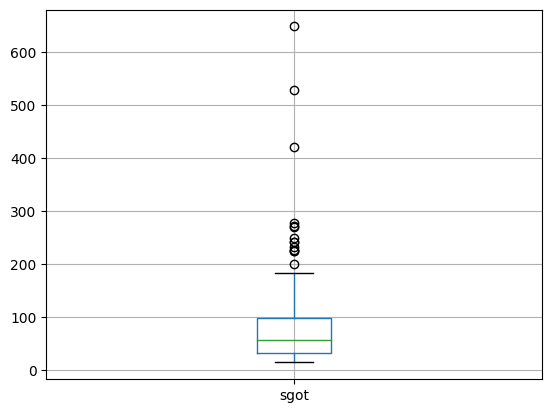

In [61]:
boxplot = df.boxplot(column=['sgot'])

In [62]:
eliminate_outliers('sgot',qrt_sgot,iqr_sgot)

Bigote Superior:  197.125 
Bigote Inferior:  -65.875
outliers superior: (array([  4,  11,  47,  72,  76,  81, 102, 103, 105, 106, 121, 129, 144,
       147]),) 
outliers_inferior:  (array([], dtype=int64),)


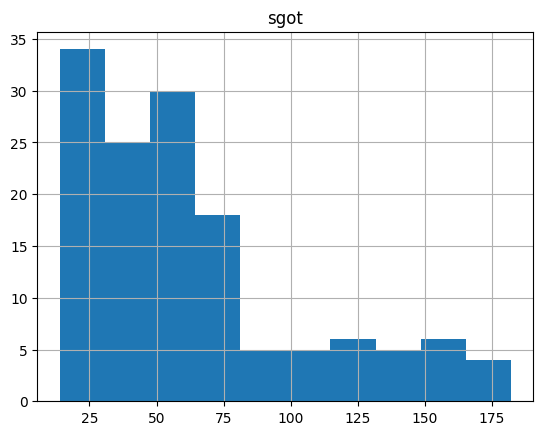

In [63]:
histo = df.hist(column='sgot')

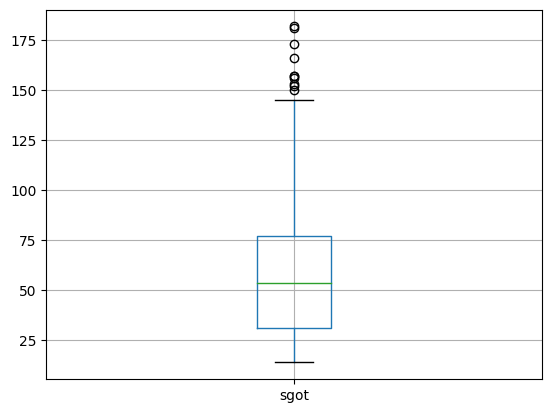

In [64]:
boxplot = df.boxplot(column=['sgot'])

Ahora lo aplicamos para las diferentes columnas numericas

Vaciamos los nombres de las diferentes columnas en una lista, esto para tenerlas ordenadas y poder llamar a las funciones para los quartiles y la eliminacion de outliers en un ciclo y no hacerlo de una por una

Aquí especificamos que las columna sean de tipo numerico y que no sean las columnas que ya trabajamos anteriormente  
`if "int" in t or "float" in t and df.columns.values[i] != 'albumin' and df.columns.values[i] != 'sgot':` 


In [65]:
i=0
for c in df.columns:
  t = str(df[c].dtype)
  if "int" in t or "float" in t and df.columns.values[i] != 'albumin' and df.columns.values[i] != 'sgot':
    qrt, iqr = calculate_quartiles(df.columns.values[i])
    eliminate_outliers(df.columns.values[i],qrt,iqr)
  i = i +1

0.25    32.0
0.75    50.0
Name: age, dtype: float64 
 18.0
Bigote Superior:  77.0 
Bigote Inferior:  5.0
outliers superior: (array([2]),) 
outliers_inferior:  (array([], dtype=int64),)
0.25    0.7
0.75    1.5
Name: bilirubin, dtype: float64 
 0.8
Bigote Superior:  2.7 
Bigote Inferior:  -0.5000000000000002
outliers superior: (array([ 38,  58,  63,  67,  84,  90,  92,  93, 102, 106, 107, 113, 115,
       125, 130]),) 
outliers_inferior:  (array([], dtype=int64),)
0.25     73.625
0.75    128.250
Name: alk_phosphate, dtype: float64 
 54.625
Bigote Superior:  210.1875 
Bigote Inferior:  -8.3125
outliers superior: (array([ 27,  79,  89, 105, 111]),) 
outliers_inferior:  (array([], dtype=int64),)
0.25    49.666667
0.75    77.000000
Name: protime, dtype: float64 
 27.33333333333333
Bigote Superior:  118.0 
Bigote Inferior:  8.666666666666679
outliers superior: (array([], dtype=int64),) 
outliers_inferior:  (array([100]),)


Hacemos un ciclo para calcular los quartiles de cada columna

In [44]:
for c in columnas:
  qrt, iqr = calculate_quartiles(c)
  eliminate_outliers(c,qrt,iqr)

0.25    32.0
0.75    50.0
Name: age, dtype: float64 
 18.0
Bigote Superior:  77.0 
Bigote Inferior:  5.0
outliers superior: (array([2]),) 
outliers_inferior:  (array([], dtype=int64),)
0.25    0.7
0.75    1.5
Name: bilirubin, dtype: float64 
 0.8
Bigote Superior:  2.7 
Bigote Inferior:  -0.5000000000000002
outliers superior: (array([ 38,  58,  63,  67,  84,  90,  92,  93, 102, 106, 107, 113, 115,
       125, 130]),) 
outliers_inferior:  (array([], dtype=int64),)
0.25     73.625
0.75    128.250
Name: alk_phosphate, dtype: float64 
 54.625
Bigote Superior:  210.1875 
Bigote Inferior:  -8.3125
outliers superior: (array([ 27,  79,  89, 105, 111]),) 
outliers_inferior:  (array([], dtype=int64),)
0.25    49.666667
0.75    77.000000
Name: protime, dtype: float64 
 27.33333333333333
Bigote Superior:  118.0 
Bigote Inferior:  8.666666666666679
outliers superior: (array([], dtype=int64),) 
outliers_inferior:  (array([100]),)


Exportamos el dataframe modificado

In [67]:
df.to_csv('newhepatitis.csv')